# Overfitting demo

## Create a dataset based on a true sinusoidal relationship
Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(4x)$:

In [1]:
import turicreate
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval [0,1)

In [2]:
random.seed(98103)
n = 30
x = turicreate.SArray([random.random() for i in range(n)]).sort()

Compute y

In [3]:
y = x.apply(lambda x: math.sin(4*x))

Add random Gaussian noise to y

In [4]:
random.seed(1)
e = turicreate.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

### Put data into an SFrame to manipulate later

In [5]:
data = turicreate.SFrame({'X1':x,'Y':y})
data

X1,Y
0.03957894495006575,0.5870501910256387
0.04156809967912256,0.6486558513722105
0.0724319480800758,0.30780330948476986
0.1502890446221763,0.31074844741664676
0.16133414450223427,0.23740962549610656
0.19195631279497838,0.7050171572238372
0.23283391714465285,0.4617166769923188
0.25990098016580054,0.38326050785082555
0.3801458148686865,1.065176914291498
0.432444723507992,1.031847069489963


### Create a function to plot the data, since we'll do it many times

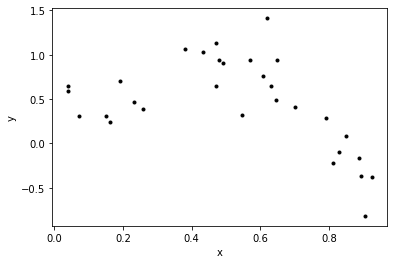

In [6]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

## Define some useful polynomial regression functions

Define a function to create our features for a polynomial regression model of any degree:

In [7]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

# Example: Adding columns for x^2 and x^3
polynomial_features(data, 3)

X1,Y,X2,X3
0.03957894495006575,0.5870501910256387,0.0015664928833603355,6.20001355951885e-05
0.04156809967912256,0.6486558513722105,0.0017279069109334693,7.18258067099272e-05
0.0724319480800758,0.30780330948476986,0.0052463871026747965,0.0003800060382289202
0.1502890446221763,0.31074844741664676,0.022586796933446496,0.003394548132202775
0.16133414450223427,0.23740962549610656,0.026028706182267807,0.004199319044416193
0.19195631279497838,0.7050171572238372,0.03684722602184358,0.007073057643876273
0.23283391714465285,0.4617166769923188,0.054211632972923064,0.012622306859893899
0.25990098016580054,0.38326050785082555,0.06754851949114385,0.01755592642449697
0.3801458148686865,1.065176914291498,0.14451084056217767,0.05493519124286786
0.432444723507992,1.031847069489963,0.18700843888990365,0.0808708126494056


Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":

In [8]:
def polynomial_regression(data, deg):
    model = turicreate.linear_regression.create(
        polynomial_features(data,deg), 
        target='Y',
        l2_penalty=0.,
        l1_penalty=0.,
        validation_set=None,
        verbose=False)
    return model

Define function to plot data and predictions made, since we are going to use it many times.

In [9]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = turicreate.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Create a function that prints the polynomial coefficients in a pretty way :)

In [10]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print(f'Learned polynomial for degree {deg}:')
    w.reverse()
    print(numpy.poly1d(w))

## Fit a degree-2 polynomial

Fit our degree-2 polynomial to the data generated above:

In [11]:
model = polynomial_regression(data, deg=2)

Inspect learned parameters

In [12]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


Form and plot our predictions along a grid of x values:

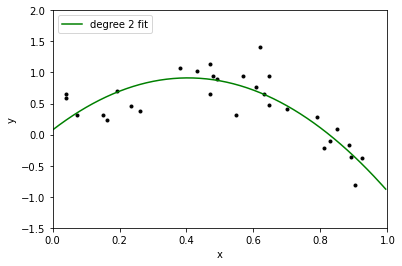

In [13]:
plot_poly_predictions(data,model)

## Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


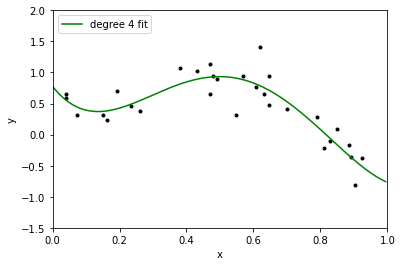

In [14]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

## Fit a degree-16 polynomial

In [15]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14             13
-6.534e+05 x  + 2.751e+06 x  - 5.283e+06 x  + 7.581e+06 x 
              12             11             10             9
 - 9.584e+06 x  + 8.091e+06 x  - 2.957e+06 x  + 8.959e+05 x
              8             7             6             5            4
 - 3.809e+06 x + 5.873e+06 x - 4.344e+06 x + 1.845e+06 x - 4.72e+05 x
             3        2
 + 7.18e+04 x - 6067 x + 245.4 x - 3.05


### Woah!!!!  Those coefficients are *crazy*!  On the order of 10^6.

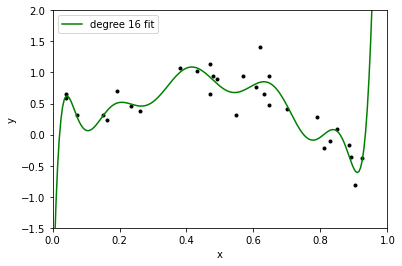

In [16]:
plot_poly_predictions(data,model)

### Above: Fit looks pretty wild, too.  Here's a clear example of how overfitting is associated with very large magnitude estimated coefficients.

# Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength lambda (here called "L1_penalty").  In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients $\|w\|$.

Define our function to solve the lasso objective for a polynomial regression model of any degree:

In [17]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = turicreate.linear_regression.create(polynomial_features(data,deg), 
                                                target='Y', l2_penalty=0.,
                                                l1_penalty=l1_penalty,
                                                validation_set=None, 
                                                solver='fista', verbose=False,
                                                max_iterations=3000, convergence_threshold=1e-10)
    return model

## Explore the lasso solution as a function of a few different penalty strengths

We refer to lambda in the lasso case below as "l1_penalty"

l1_penalty = 1.000000e-04
number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
number of nonzeros = 14
Learned polynomial for degree 16:
        16             15           11          10         9          8
-1.181 x  - 0.0002672 x  + 0.08707 x  + 0.7386 x  + 3.828 x + 0.4758 x
           7            6          5         4            3         2
 + 0.1281 x + 0.003121 x - 0.6152 x - 10.11 x - 0.000204 x + 6.686 x - 1.28 x + 0.5057


l1_penalty = 1.000000e-01
number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
number o

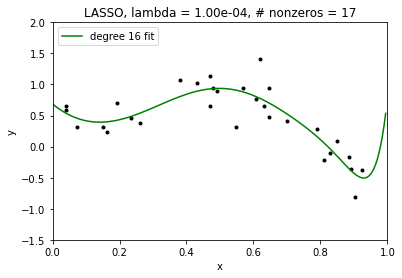

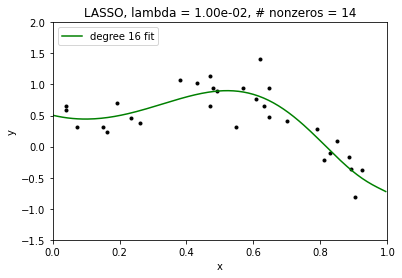

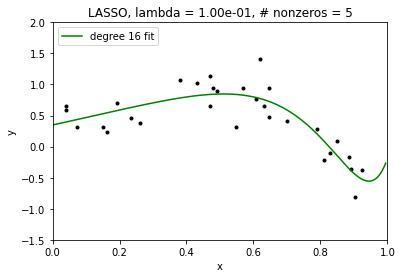

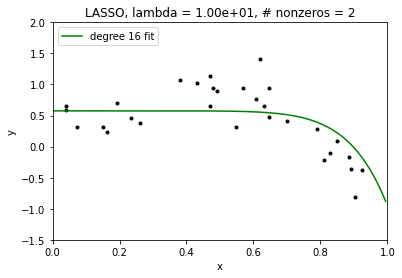

In [18]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print('l1_penalty = %e' % l1_penalty)
    print('number of nonzeros = %d' % (model.coefficients['value']).nnz())
    print_coefficients(model)
    print('\n')
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))

Above: We see that as lambda increases, we get sparser and sparser solutions.  However, even for our non-sparse case for lambda=0.0001, the fit of our high-order polynomial is not too wild.  This is because, like in ridge, coefficients included in the lasso solution are shrunk relative to those of the least squares (unregularized) solution.  This leads to better behavior even without sparsity.  Of course, as lambda goes to 0, the amount of this shrinkage decreases and the lasso solution approaches the (wild) least squares solution.